In [1]:
# I will attempt to use an SVM or tree to solve this problem initially
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Will allow me to test different parameters
from sklearn.model_selection import GridSearchCV
# The data may need to be scaled
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# To manipulate the datasets
import pandas as pd
# We may need to shuffle the data fed in
from sklearn.utils import shuffle 

In [24]:
train = pd.read_csv('data/box_scores.csv')
trainScores = pd.read_csv('data/fixture_information.csv')

test = pd.read_csv('data/test_fixtures_actuals.csv')
testScores = pd.read_csv('data/test_fixtures.csv')

In [25]:
train

,FixtureKey,Team,2PM,2PA,3PM,3PA,FTM,FTA,ORB,DRB,AST,STL,BLK,TOV,PF
0,LIPSCO v A PEAY 14-Jan-2023,2,18,41,7,21,15,16,12,19,13,7,4,12,21
1,LIPSCO v A PEAY 14-Jan-2023,1,16,29,10,22,24,29,7,25,17,5,2,13,18
2,QUENNC v A PEAY 29-Dec-2022,2,20,44,8,18,13,15,9,19,18,6,2,10,26
3,QUENNC v A PEAY 29-Dec-2022,1,18,32,7,19,24,36,11,25,14,4,2,13,18
4,FGCU v A PEAY 24-Feb-2023,2,20,29,8,33,7,11,8,23,19,6,1,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,YSU v SIUE 20-Nov-2021,1,18,31,5,17,15,23,7,23,9,9,3,18,19
13318,YSU v OAK 09-Feb-2022,2,18,32,5,23,20,25,10,24,13,7,1,14,16
13319,YSU v OAK 09-Feb-2022,1,21,35,9,33,9,11,12,25,20,4,2,9,21
13320,DET v YSU 12-Jan-2023,1,26,44,6,23,9,12,11,26,12,3,2,5,16


In [26]:
test

,FixtureKey,Team,2PM,2PA,3PM,3PA,FTM,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,IsWinner,TeamHandicap
0,ID ST v E WASH 25-Feb-2023,2,9,19,11,31,12,15,8,25,15,3,4,19,23,63,0,-6.0
1,ID ST v E WASH 25-Feb-2023,1,13,27,10,28,15,20,9,24,15,7,3,11,19,71,1,6.0
2,WEB ST v IDAHO 25-Feb-2023,2,7,24,9,23,12,19,4,28,10,4,2,13,17,53,0,8.0
3,WEB ST v IDAHO 25-Feb-2023,1,16,35,9,23,8,10,6,32,11,8,1,8,16,67,1,-8.0
4,MONT v SAC ST 25-Feb-2023,1,18,30,8,23,14,20,7,16,12,7,2,7,18,74,1,-7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,NC CEN v HOWARD 25-Feb-2023,1,21,41,4,17,14,17,14,26,11,5,8,15,14,68,1,NaN
256,JACKST v TX SOU 25-Feb-2023,1,22,41,4,10,15,18,6,19,8,9,2,9,10,71,1,-1.5
257,JACKST v TX SOU 25-Feb-2023,2,24,46,5,14,6,6,9,20,8,6,2,12,16,69,0,1.5
258,BUCKNL v LAFAYE 25-Feb-2023,1,17,26,9,27,14,19,6,27,20,7,4,9,13,75,1,NaN


In [27]:
train.fillna(0)
test.fillna(0)

,FixtureKey,Team,2PM,2PA,3PM,3PA,FTM,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,IsWinner,TeamHandicap
0,ID ST v E WASH 25-Feb-2023,2,9,19,11,31,12,15,8,25,15,3,4,19,23,63,0,-6.0
1,ID ST v E WASH 25-Feb-2023,1,13,27,10,28,15,20,9,24,15,7,3,11,19,71,1,6.0
2,WEB ST v IDAHO 25-Feb-2023,2,7,24,9,23,12,19,4,28,10,4,2,13,17,53,0,8.0
3,WEB ST v IDAHO 25-Feb-2023,1,16,35,9,23,8,10,6,32,11,8,1,8,16,67,1,-8.0
4,MONT v SAC ST 25-Feb-2023,1,18,30,8,23,14,20,7,16,12,7,2,7,18,74,1,-7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,NC CEN v HOWARD 25-Feb-2023,1,21,41,4,17,14,17,14,26,11,5,8,15,14,68,1,0.0
256,JACKST v TX SOU 25-Feb-2023,1,22,41,4,10,15,18,6,19,8,9,2,9,10,71,1,-1.5
257,JACKST v TX SOU 25-Feb-2023,2,24,46,5,14,6,6,9,20,8,6,2,12,16,69,0,1.5
258,BUCKNL v LAFAYE 25-Feb-2023,1,17,26,9,27,14,19,6,27,20,7,4,9,13,75,1,0.0


In [28]:
train['PTS'] = train['2PM']*2 + train['3PM']*3 + train['FTM']
train['IsWinner'] = 0
for i in range(0,len(train),2):
    if train.loc[i,'PTS'] > train.loc[i+1,'PTS']:
        train.loc[i,'IsWinner'] = 1
    else:
        train.loc[i+1,'IsWinner'] = 1

In [29]:
def setRateStats(dataframe):
    dataframe['2PP'] = dataframe['2PM']/dataframe['2PA']
    dataframe['3PP'] = dataframe['3PM']/dataframe['3PA']
    dataframe['FTP'] = dataframe['FTM']/dataframe['FTA']
    
    dataframe['FGA'] = dataframe['2PA']+dataframe['3PA']
    dataframe['FGM'] = dataframe['2PM']+dataframe['3PM']

    dataframe['ASTR'] = dataframe['AST']/dataframe['FGM']
    dataframe['TASTR'] = dataframe['AST']/(dataframe['FGA']+(0.44*dataframe['FTA'])+dataframe['TOV'])
    dataframe['ATR'] = dataframe['AST']/dataframe['TOV']
    
    
    dataframe['FTR'] = dataframe['FTA']/dataframe['FGA']
    dataframe['FTCR'] = dataframe['FTR']*dataframe['FTP']
    dataframe['FGP'] = dataframe['FGM']/dataframe['FGA']
    
    dataframe['FGRR'] = dataframe['ORB']/dataframe['FGA']
    
    return dataframe

In [30]:
train = setRateStats(train)
test = setRateStats(test)

In [33]:
train

,FixtureKey,Team,2PM,2PA,3PM,3PA,FTM,FTA,ORB,DRB,...,FTP,FGA,FGM,ASTR,TASTR,ATR,FTR,FTCR,FGP,FGRR
0,LIPSCO v A PEAY 14-Jan-2023,2,18,41,7,21,15,16,12,19,...,0.937500,62,25,0.520000,0.160415,1.083333,0.258065,0.241935,0.403226,0.193548
1,LIPSCO v A PEAY 14-Jan-2023,1,16,29,10,22,24,29,7,25,...,0.827586,51,26,0.653846,0.221470,1.307692,0.568627,0.470588,0.509804,0.137255
2,QUENNC v A PEAY 29-Dec-2022,2,20,44,8,18,13,15,9,19,...,0.866667,62,28,0.642857,0.229008,1.800000,0.241935,0.209677,0.451613,0.145161
3,QUENNC v A PEAY 29-Dec-2022,1,18,32,7,19,24,36,11,25,...,0.666667,51,25,0.560000,0.175351,1.076923,0.705882,0.470588,0.490196,0.215686
4,FGCU v A PEAY 24-Feb-2023,2,20,29,8,33,7,11,8,23,...,0.636364,62,28,0.678571,0.247267,1.900000,0.177419,0.112903,0.451613,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,YSU v SIUE 20-Nov-2021,1,18,31,5,17,15,23,7,23,...,0.652174,48,23,0.391304,0.118234,0.500000,0.479167,0.312500,0.479167,0.145833
13318,YSU v OAK 09-Feb-2022,2,18,32,5,23,20,25,10,24,...,0.800000,55,23,0.565217,0.162500,0.928571,0.454545,0.363636,0.418182,0.181818
13319,YSU v OAK 09-Feb-2022,1,21,35,9,33,9,11,12,25,...,0.818182,68,30,0.666667,0.244379,2.222222,0.161765,0.132353,0.441176,0.176471
13320,DET v YSU 12-Jan-2023,1,26,44,6,23,9,12,11,26,...,0.750000,67,32,0.375000,0.155280,2.400000,0.179104,0.134328,0.477612,0.164179


In [34]:
# Gets the differences between the stats created
def getComparisons(dataframe):
    dataframe['FGPD'] = 0
    dataframe['ASTRD'] = 0
    dataframe['TASTRD'] = 0
    dataframe['FTRD'] = 0
    dataframe['FTCRD'] = 0
    dataframe['2PPD'] = 0
    dataframe['3PPD'] = 0
    dataframe['FTPD'] = 0
    dataframe['FGRRD'] = 0
    
    for i in range(0,len(dataframe),2):
        dataframe.loc[i,'FGPD'] = dataframe.loc[i,'FGP'] - dataframe.loc[i+1,'FGP']
        dataframe.loc[i+1,'FGPD'] = dataframe.loc[i+1,'FGP'] - dataframe.loc[i,'FGP']
        
        dataframe.loc[i,'ASTRD'] = dataframe.loc[i,'ASTR'] - dataframe.loc[i+1,'ASTR']
        dataframe.loc[i+1,'ASTRD'] = dataframe.loc[i+1,'ASTR'] - dataframe.loc[i,'ASTR']
        
        dataframe.loc[i,'TASTRD'] = dataframe.loc[i,'TASTR'] - dataframe.loc[i+1,'TASTR']
        dataframe.loc[i+1,'TASTRD'] = dataframe.loc[i+1,'TASTR'] - dataframe.loc[i,'TASTR']
        
        dataframe.loc[i,'FTRD'] = dataframe.loc[i,'FTR'] - dataframe.loc[i+1,'FTR']
        dataframe.loc[i+1,'FTRD'] = dataframe.loc[i+1,'FTR'] - dataframe.loc[i,'FTR']
        
        dataframe.loc[i,'FTCRD'] = dataframe.loc[i,'FTCR'] - dataframe.loc[i+1,'FTCR']
        dataframe.loc[i+1,'FTCRD'] = dataframe.loc[i+1,'FTCR'] - dataframe.loc[i,'FTCR']
        
        dataframe.loc[i,'2PPD'] = dataframe.loc[i,'2PP'] - dataframe.loc[i+1,'2PP']
        dataframe.loc[i+1,'2PPD'] = dataframe.loc[i+1,'2PP'] - dataframe.loc[i,'2PP']
        
        dataframe.loc[i,'3PPD'] = dataframe.loc[i,'3PP'] - dataframe.loc[i+1,'3PP']
        dataframe.loc[i+1,'3PPD'] = dataframe.loc[i+1,'3PP'] - dataframe.loc[i,'3PP']
        
        dataframe.loc[i,'FTPD'] = dataframe.loc[i,'FTP'] - dataframe.loc[i+1,'FTP']
        dataframe.loc[i+1,'FTPD'] = dataframe.loc[i+1,'FTP'] - dataframe.loc[i,'FTP']
        
        dataframe.loc[i,'FGRRD'] = dataframe.loc[i,'FGRR'] - dataframe.loc[i+1,'FGRR']
        dataframe.loc[i+1,'FGRRD'] = dataframe.loc[i+1,'FGRR'] - dataframe.loc[i,'FGRR']

    return dataframe

In [35]:
train = getComparisons(train)
test = getComparisons(test)

In [36]:
train

,FixtureKey,Team,2PM,2PA,3PM,3PA,FTM,FTA,ORB,DRB,...,FGRR,FGPD,ASTRD,TASTRD,FTRD,FTCRD,2PPD,3PPD,FTPD,FGRRD
0,LIPSCO v A PEAY 14-Jan-2023,2,18,41,7,21,15,16,12,19,...,0.193548,-0.106578,-0.133846,-0.061055,-0.310563,-0.228653,-0.112700,-0.121212,0.109914,0.056293
1,LIPSCO v A PEAY 14-Jan-2023,1,16,29,10,22,24,29,7,25,...,0.137255,0.106578,0.133846,0.061055,0.310563,0.228653,0.112700,0.121212,-0.109914,-0.056293
2,QUENNC v A PEAY 29-Dec-2022,2,20,44,8,18,13,15,9,19,...,0.145161,-0.038583,0.082857,0.053657,-0.463947,-0.260911,-0.107955,0.076023,0.200000,-0.070525
3,QUENNC v A PEAY 29-Dec-2022,1,18,32,7,19,24,36,11,25,...,0.215686,0.038583,-0.082857,-0.053657,0.463947,0.260911,0.107955,-0.076023,-0.200000,0.070525
4,FGCU v A PEAY 24-Feb-2023,2,20,29,8,33,7,11,8,23,...,0.129032,-0.065628,0.178571,0.049378,-0.167408,-0.162959,0.158405,-0.257576,-0.163636,0.008343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,YSU v SIUE 20-Nov-2021,1,18,31,5,17,15,23,7,23,...,0.145833,0.000000,-0.217391,-0.069232,0.020833,0.020833,0.097887,-0.179567,0.015810,0.000000
13318,YSU v OAK 09-Feb-2022,2,18,32,5,23,20,25,10,24,...,0.181818,-0.022995,-0.101449,-0.081879,0.292781,0.231283,-0.037500,-0.055336,-0.018182,0.005348
13319,YSU v OAK 09-Feb-2022,1,21,35,9,33,9,11,12,25,...,0.176471,0.022995,0.101449,0.081879,-0.292781,-0.231283,0.037500,0.055336,0.018182,-0.005348
13320,DET v YSU 12-Jan-2023,1,26,44,6,23,9,12,11,26,...,0.164179,-0.055721,-0.156250,-0.080308,-0.054229,-0.015672,-0.009091,-0.179130,0.107143,0.047512


In [37]:
pd.set_option('display.max_columns', None)

In [38]:
test

,FixtureKey,Team,2PM,2PA,3PM,3PA,FTM,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,IsWinner,TeamHandicap,2PP,3PP,FTP,FGA,FGM,ASTR,TASTR,ATR,FTR,FTCR,FGP,FGRR,FGPD,ASTRD,TASTRD,FTRD,FTCRD,2PPD,3PPD,FTPD,FGRRD
0,ID ST v E WASH 25-Feb-2023,2,9,19,11,31,12,15,8,25,15,3,4,19,23,63,0,-6.0,0.473684,0.354839,0.800000,50,20,0.750000,0.198413,0.789474,0.300000,0.240000,0.400000,0.160000,-0.018182,0.097826,-0.002122,-0.063636,-0.032727,-0.007797,-0.002304,0.050000,-0.003636
1,ID ST v E WASH 25-Feb-2023,1,13,27,10,28,15,20,9,24,15,7,3,11,19,71,1,6.0,0.481481,0.357143,0.750000,55,23,0.652174,0.200535,1.363636,0.363636,0.272727,0.418182,0.163636,0.018182,-0.097826,0.002122,0.063636,0.032727,0.007797,0.002304,-0.050000,0.003636
2,WEB ST v IDAHO 25-Feb-2023,2,7,24,9,23,12,19,4,28,10,4,2,13,17,53,0,8.0,0.291667,0.391304,0.631579,47,16,0.625000,0.146284,0.769231,0.404255,0.255319,0.340426,0.085106,-0.090609,0.185000,-0.009966,0.231842,0.117388,-0.165476,0.000000,-0.168421,-0.018342
3,WEB ST v IDAHO 25-Feb-2023,1,16,35,9,23,8,10,6,32,11,8,1,8,16,67,1,-8.0,0.457143,0.391304,0.800000,58,25,0.440000,0.156250,1.375000,0.172414,0.137931,0.431034,0.103448,0.090609,-0.185000,0.009966,-0.231842,-0.117388,0.165476,0.000000,0.168421,0.018342
4,MONT v SAC ST 25-Feb-2023,1,18,30,8,23,14,20,7,16,12,7,2,7,18,74,1,-7.5,0.600000,0.347826,0.700000,53,26,0.461538,0.174419,1.714286,0.377358,0.264151,0.490566,0.132075,-0.064990,-0.098462,-0.033050,-0.000419,-0.024738,-0.015385,-0.125858,-0.064706,-0.023480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,NC CEN v HOWARD 25-Feb-2023,1,21,41,4,17,14,17,14,26,11,5,8,15,14,68,1,NaN,0.512195,0.235294,0.823529,58,25,0.440000,0.136680,0.733333,0.293103,0.241379,0.431034,0.241379,0.069923,-0.098462,-0.022846,0.237548,0.199713,0.137195,-0.077206,0.073529,-0.050287
256,JACKST v TX SOU 25-Feb-2023,1,22,41,4,10,15,18,6,19,8,9,2,9,10,71,1,-1.5,0.536585,0.400000,0.833333,51,26,0.307692,0.117786,0.888889,0.352941,0.294118,0.509804,0.117647,0.026471,0.031830,0.010604,0.252941,0.194118,0.014846,0.042857,-0.166667,-0.032353
257,JACKST v TX SOU 25-Feb-2023,2,24,46,5,14,6,6,9,20,8,6,2,12,16,69,0,1.5,0.521739,0.357143,1.000000,60,29,0.275862,0.107181,0.666667,0.100000,0.100000,0.483333,0.150000,-0.026471,-0.031830,-0.010604,-0.252941,-0.194118,-0.014846,-0.042857,0.166667,0.032353
258,BUCKNL v LAFAYE 25-Feb-2023,1,17,26,9,27,14,19,6,27,20,7,4,9,13,75,1,NaN,0.653846,0.333333,0.736842,53,26,0.769231,0.284252,2.222222,0.358491,0.264151,0.490566,0.113208,0.054202,0.185897,0.099067,0.085763,0.136878,0.216346,-0.101449,0.270175,-0.014065


In [50]:
train = train.fillna(0)
test = test.fillna(0)

In [51]:
features = ['FTP','ASTR','TASTR','ATR','FTR','FTCR','FGP','FGRR','FGPD','ASTRD','TASTRD','FTRD','FTCRD','2PPD','3PPD','FTPD','FGRRD']
target = 'IsWinner'


In [52]:
trainX = train[features]
trainY = train[target]

testX = test[features]
testY = test[target]


In [44]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [46]:
from sklearn.pipeline import Pipeline

In [55]:
def getClfMetrics(model, X, y):
    print('Test Accuracy:', accuracy_score(y, model.predict(X)))
    print('Classification Report\n')
    print(classification_report(y, model.predict(X)))
    
    cMatrix = confusion_matrix(y, model.predict(X))
    cMDisplay = ConfusionMatrixDisplay(confusion_matrix=cMatrix, display_labels=['Lost','Won'])
    cMDisplay.plot()
    plt.show()
    

def runClfTreeModel(trainX, trainY, testX, testY):
    treePipeline = Pipeline(steps = [('scaler', StandardScaler()),('clf', DecisionTreeClassifier())])
    treePipelineParamGrid = {
        'scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf' : [DecisionTreeClassifier(), RandomForestClassifier()],
        'clf__criterion' : ['gini', 'log_loss', 'entropy']
    }
    
    treePipelineCV = GridSearchCV(treePipeline,treePipelineParamGrid,refit=True)
    treePipelineCV.fit(trainX,trainY)
    
    print('Best Parameters:',treePipelineCV.best_params_)
    print('Best Model Validation Score',treePipelineCV.best_score_)
    
    getClfMetrics(treePipelineCV.best_estimator_, testX, testY)
    
    return treePipelineCV.best_estimator_
    
def runClfVectorModel(trainX, trainY, testX, testY):
    vectorPipeline = Pipeline(steps = [('scaler', StandardScaler()),('clf', SVC())])
    vectorPipelineParamGrid = {
        'scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf__kernel' : ['linear','poly','rbf','sigmoid']
    }
    
    vectorPipelineCV = GridSearchCV(vectorPipeline,vectorPipelineParamGrid,refit=True)
    vectorPipelineCV.fit(trainX,trainY)
    
    print('Best Parameters:',vectorPipelineCV.best_params_)
    print('Best Model Validation Score',vectorPipelineCV.best_score_)
    
    getClfMetrics(vectorPipelineCV.best_estimator_, testX, testY)
    
    return vectorPipelineCV.best_estimator_

Best Parameters: {'clf': RandomForestClassifier(criterion='entropy'), 'clf__criterion': 'entropy', 'scaler': 'passthrough'}
Best Model Validation Score 0.8957375104936082
Test Accuracy: 0.8538461538461538
Classification Report

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       130
           1       0.85      0.85      0.85       130

    accuracy                           0.85       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.85      0.85      0.85       260



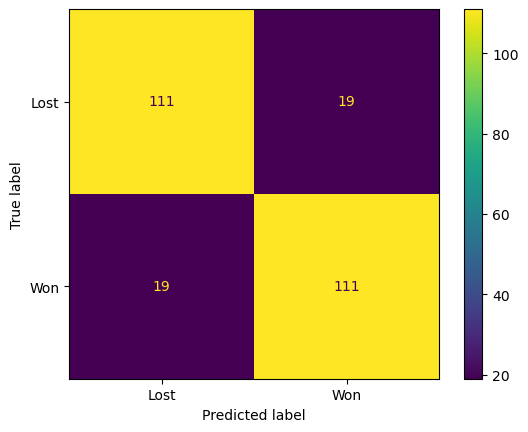

In [56]:
clfTree = runClfTreeModel(trainX, trainY, testX, testY)

Best Parameters: {'clf__kernel': 'poly', 'scaler': MinMaxScaler()}
Best Model Validation Score 0.9533856464344268
Test Accuracy: 0.9230769230769231
Classification Report

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       130
           1       0.92      0.93      0.92       130

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260



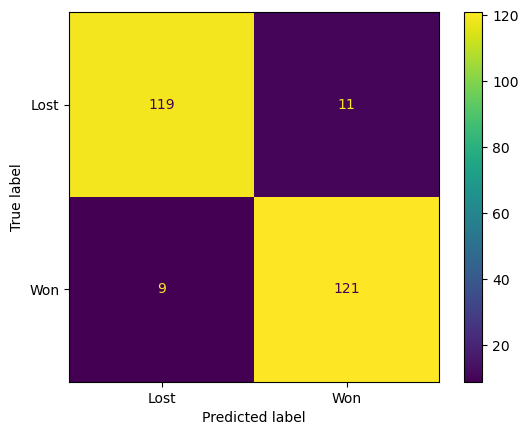

In [57]:
clfVector = runClfVectorModel(trainX, trainY, testX, testY)

In [59]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [65]:
def getRegMetrics(y, y_pred):
    print('Test R^2 score:', r2_score(y, y_pred))
    print('Test MAE Loss:', mean_absolute_error(y, y_pred))
    print('Test MSE Loss:', mean_squared_error(y, y_pred))

def runRegTreeModel(trainX, trainY, testX, testY):
    treePipeline = Pipeline(steps = [('scaler', StandardScaler()),('clf', DecisionTreeClassifier())])
    treePipelineParamGrid = {
        'scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf' : [DecisionTreeRegressor(), RandomForestRegressor()],
        'clf__criterion' : ['absolute_error', 'friedman_mse', 'poisson', 'squared_error']
    }
    
    treePipelineCV = GridSearchCV(treePipeline,treePipelineParamGrid,refit=True)
    treePipelineCV.fit(trainX,trainY)
    
    print('Best Parameters:',treePipelineCV.best_params_)
    print('Best Model Validation Score',treePipelineCV.best_score_)
    
    y_pred = treePipelineCV.predict(testX)
    
    getRegMetrics(testY,y_pred)
    
    return treePipelineCV.best_estimator_
    
def runRegVectorModel(trainX, trainY, testX, testY):
    vectorPipeline = Pipeline(steps = [('scaler', StandardScaler()),('clf', SVR())])
    vectorPipelineParamGrid = {
        'scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'clf__kernel' : ['linear','poly','rbf','sigmoid']
    }
    
    vectorPipelineCV = GridSearchCV(vectorPipeline,vectorPipelineParamGrid,refit=True)
    vectorPipelineCV.fit(trainX,trainY)
    
    print('Best Parameters:',vectorPipelineCV.best_params_)
    print('Best Model Validation Score',vectorPipelineCV.best_score_)
    
    y_pred = vectorPipelineCV.predict(testX)
    
    getRegMetrics(testY,y_pred)
    
    return vectorPipelineCV.best_estimator_

In [67]:
regVector = runRegVectorModel(trainX, trainY, testX, testY)

Best Parameters: {'clf__kernel': 'rbf', 'scaler': StandardScaler()}
Best Model Validation Score 0.755026440092901
Test R^2 score: 0.694541821456873
Test MAE Loss: 0.19873964468807995
Test MSE Loss: 0.07636454463578175


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
clfLog = LogisticRegression().fit(trainX,trainY)
y_pred = clfLog.predict(testX)
getRegMetrics(testY,y_pred)

Test R^2 score: 0.4461538461538461
Test MAE Loss: 0.13846153846153847
Test MSE Loss: 0.13846153846153847
